In [8]:
import numpy as np
import matplotlib.pylab as plt
from ugradio.dft import dft


# Import Data

In [9]:
# range of samp frequencies in kHz
samp_freqs = np.arange(1000, 2400, 200)

# array containing the voltage outputs for all the different frequencies
all_data = {}
for freq in samp_freqs:
    fname = '../data_sec5/freq' + str(freq) + '.npy'
    data = np.load(fname)[0]
    all_data[freq] = data

len(all_data[1000])

2048

In [10]:
def plot_all_data():
    for freq, data in all_data.items():
        plt.figure()
        plt.plot(np.arange(len(data)), data)
        plt.scatter(np.arange(len(data)), data)
        plt.xlim(0, 20)
        plt.title('Freq = ' + str(freq) + ' kHz')
        plt.xlabel('Time')
        plt.ylabel('Voltage [V]')
        plt.show()
    
# plot_all_data()

# Calculate Power Spectrum

In [11]:
def power(samp_freq, data, small_freq_increm=False):
    N = len(data)
    # if small_freq_increm:
    #     increm = 10**-3
    #     d = dft(data, f=np.arange(-N / 2 / samp_freq, N / 2 / samp_freq, samp_freq / N * increm))
    d = dft(data)
    freqs = d[0]
    ft = d[1]
    return freqs, np.abs(ft)**2

# Plot Power Spectrum

### 5.4 Observe Spectral Leakage 
Under perfect conditions, we would have a simple vertical line at the signal frequency, but with real-world conditions, we end up with a sink function. This sink function should be centered at the signal frequency, but aliasing influences the results.

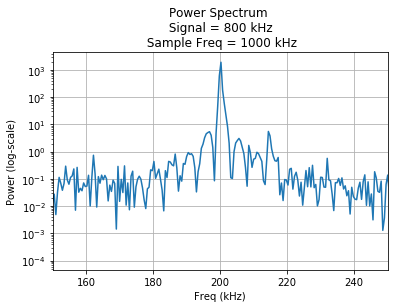

In [12]:
def plot_log_power():
    for samp_freq, data in all_data.items():
        power_dist = power(samp_freq, data)
        x = power_dist[0] * 10**3 # convert to kHz
        y = power_dist[1]

        plt.figure()
        plt.plot(x, y)
        plt.title('Power Spectrum \n Signal = 800 kHz \n Sample Freq = ' + str(samp_freq) + ' kHz')
        plt.grid(visible=True)

        # adjust x axis
        plt.xlim(150, 250) 
        plt.xlabel('Freq (kHz)')

        # adjust y axis
        plt.yscale("log")
        plt.ylabel('Power (log-scale)')
        
        plt.show()
        
        break # comment this out if desired
 
# %matplotlib inline
plot_log_power()